# CNN for Image Processing

## Imports

In [20]:
import tensorflow as tf

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [1]:
# importing dataset 
from tensorflow.keras.datasets import cifar10

In [9]:
# loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 410s 2us/step


In [21]:
class_name = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
for i in range(0, len(class_name)):
    class_name[i] = f"{i}: {class_name[i]}"

In [22]:
class_name

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [23]:
x_train.min(), x_train.max(), x_train.mean()

(0, 255, 120.70756512369792)

In [24]:
y_train.min(), y_train.max(), y_train.mean()

(0, 9, 4.5)

In [25]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

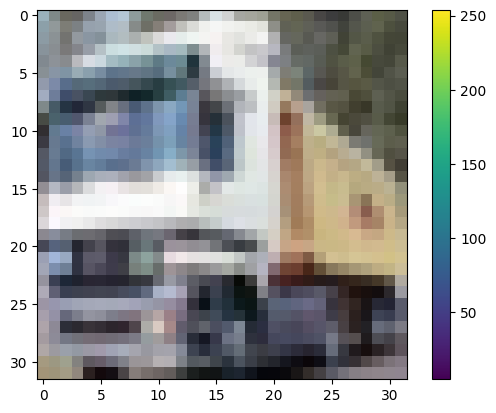

In [26]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [28]:
class_name[y_train[1][0]]

'9: truck'

In [29]:
# normalizing the images

x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
x_train.min(), x_train.max(), x_train.mean()

(0.0, 1.0, 0.4733630004850874)

In [32]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## building the cnn model

In [47]:
model = tf.keras.models.Sequential()

In [48]:
# adding first cnn layer
# 1) filters (kernel) = 32
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = relu
# 5) input shape = (32, 32, 3)
model.add(tf.keras.layers.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [49]:
# adding second layer
# 1) filters (kernel) = 32
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = relu
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [50]:
# adding third layer
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = relu
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [51]:
# adding fourth layer
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = relu
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [52]:
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [53]:
# adding flattening layer
model.add(tf.keras.layers.Flatten())

In [55]:
# adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [56]:
# adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,786 (2.32 MB)

 Trainable params: 607,786 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

## training the mode

In [58]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [59]:
# train the model
model.fit(x_train,y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 104s 20ms/step - loss: 2.2735 - sparse_categorical_accuracy: 0.2497
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 103s 21ms/step - loss: 4.4127 - sparse_categorical_accuracy: 0.1453
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 104s 21ms/step - loss: 5.8484 - sparse_categorical_accuracy: 0.1407
Epoch 4/10
 375/5000 ━━━━━━━━━━━━━━━━━━━━ 1:35 21ms/step - loss: 5.7089 - sparse_categorical_accuracy: 0.1497

KeyboardInterrupt: 

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4039 - loss: 1.8984 - val_accuracy: 0.6403 - val_loss: 1.0214
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6345 - loss: 1.0361 - val_accuracy: 0.6549 - val_loss: 0.9775
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6950 - loss: 0.8737 - val_accuracy: 0.6807 - val_loss: 0.9525
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7272 - loss: 0.7876 - val_accuracy: 0.6815 - val_loss: 0.9436
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7455 - loss: 0.7297 - val_accuracy: 0.7236 - val_loss: 0.8275
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7619 - loss: 0.6860 - val_accuracy: 0.7661 - val_loss: 0.6715
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7757 - loss: 0.6453 - val_accuracy: 0.7887 - val_loss: 0.6230
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7862 - loss: 0.6151 - 

In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,354,496 (12.80 MB)

 Trainable params: 1,117,866 (4.26 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2,235,734 (8.53 MB)

## model evaluation and prediction

In [66]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8229 - loss: 0.5777
Test Accuracy: 0.8220000267028809
Test Loss: 0.5766858458518982


In [75]:
# Get class predictions from probabilities
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Choose class with highest probability


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [76]:
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [77]:
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, classification_report
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print('\n')
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print('\n')
print(mean_squared_error(y_pred=y_pred, y_true=y_test))
print('\n')
print(classification_report(y_pred=y_pred, y_true=y_test))

[[818  22  50  13  10   3   5  12  34  33]
 [  7 923   2   2   2   2   1   1   5  55]
 [ 39   4 731  30  51  62  42  27   6   8]
 [ 15   5  49 605  47 205  30  28   6  10]
 [  6   2  49  25 797  46  21  48   4   2]
 [  7   1  27  66  23 840   5  25   0   6]
 [  4   8  28  37  26  38 847   7   1   4]
 [  8   3  17  19  23  44   1 874   2   9]
 [ 39  32   7   7   3   8   4   3 878  19]
 [ 10  53   4   5   0   4   2   4  11 907]]


0.822


2.9524


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.88      0.92      0.90      1000
           2       0.76      0.73      0.74      1000
           3       0.75      0.60      0.67      1000
           4       0.81      0.80      0.80      1000
           5       0.67      0.84      0.75      1000
           6       0.88      0.85      0.87      1000
           7       0.85      0.87      0.86      1000
           8       0.93      0.88      0.90      1000
         